In [1]:
import skimage.io
import numpy as np
ct_img_int8 = skimage.io.imread('ct_slice_int8.png')
ct_img_int16 = skimage.io.imread('ct_slice_int16.png')
mr_img_int16 = skimage.io.imread('mr_slice_int16.png')

In [2]:
# Display the data type of each image
print('ct_img_int8 data type: ', ct_img_int8.dtype)
print('ct_img_int16 data type: ', ct_img_int16.dtype)
print("mr_img_int16 data type: :", mr_img_int16.dtype)

ct_img_int8 data type:  uint8
ct_img_int16 data type:  uint16
mr_img_int16 data type: : uint16


Makes sense.

## Add code to convert image to double

In [2]:
import numpy as np

# Convert to double data type and reorientate
ct_img_int16 = ct_img_int16.astype(np.double)
ct_img_int16 = np.flip(ct_img_int16.T, axis = 1)

ct_img_int8 = ct_img_int8.astype(np.double)
ct_img_int8 = np.flip(ct_img_int8.T, axis = 1)

mr_img_int16 = mr_img_int16.astype(np.double)
mr_img_int16 = np.flip(mr_img_int16.T, axis = 1)

from utils2 import dispImage
# Display each image in a separate figure


In [3]:
type(ct_img_int16)

numpy.ndarray

Bad pipe message: %s [b"\xff)\xbcd\x86a\xfe\xe5\xd1\xd8\x01\xc8\x1f\x18\x18\xb3m\x19\x00\x00\xa6\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0s\xc0w\x00\xc4\x00\xc3\xc0#\xc0'\x00g\x00@\xc0r\xc0v\x00\xbe\x00\xbd\xc0\n\xc0\x14\x009\x008\x00\x88\x00\x87\xc0\t\xc0\x13\x003\x002\x00\x9a\x00\x99\x00E\x00D\xc0\x07\xc0\x11\xc0\x08\xc0\x12\x00\x16\x00\x13\x00\x9d\xc0\xa1\xc0\x9d\xc0Q\x00\x9c\xc0\xa0\xc0\x9c\xc0P\x00=\x00\xc0\x00<\x00\xba\x005\x00\x84\x00/\x00\x96\x00A\x00"]
Bad pipe message: %s [b'\n\x00\xff\x01']
Bad pipe message: %s [b'7\x04\x89\x1fLwB\x10\xe9\xecB\x94\xcf\xf1\xc8\xd9\xe9\xe6\x00\x00>\xc0\x14\xc0\n\x009\x008\x007\x006\xc0\x0f\xc0\x05\x005\xc0']
Bad pipe message: %s [b'\t\x003\x002\x001\x000\xc0\x0e\xc0\x04\x00/\x00\x9a\x00']
Bad pipe message: %s [b'\x99\xa8T\xf8\xef\xc5\x94\xba\xfc\xd4\x946\xf0']
Bad pipe message: %s [b

In [ ]:
ct_img_int16 = ct_img_int16.astype(np.double)
ct_img_int16 = np.flip(ct_img_int16.T, axis = 1)

In [4]:
ct_img_int16.dtype


dtype('float64')

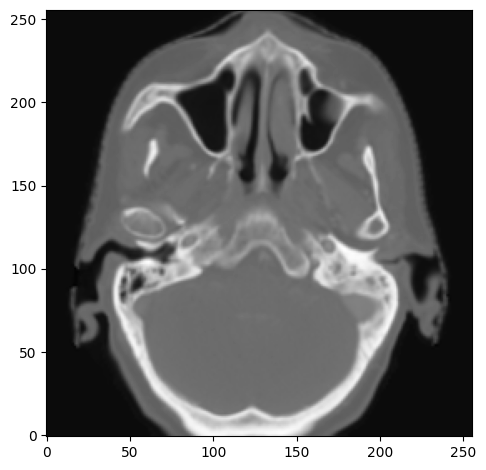

In [5]:
dispImage(ct_img_int8)

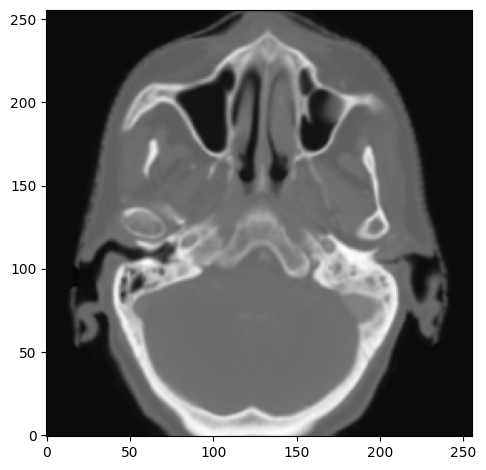

In [9]:
dispImage(ct_img_int16)

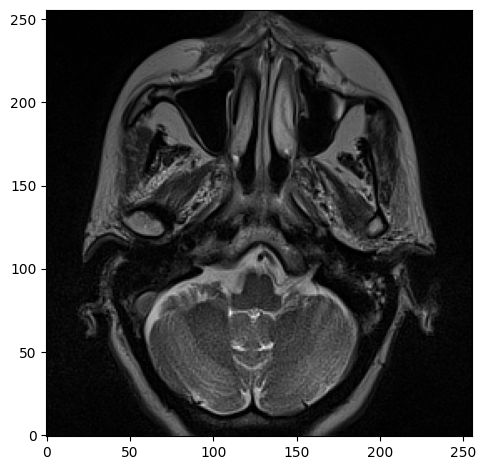

In [10]:
dispImage(mr_img_int16)

Text(0.5, 1.0, 'SSD:  8-bit CT and  8-bit CT')

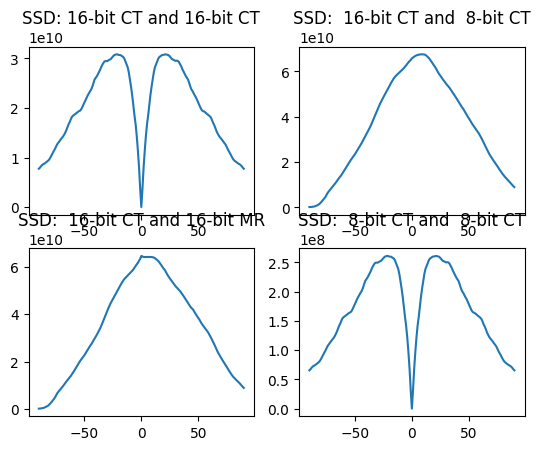

In [7]:
#%%
# ***************
# EDIT THE CODE BELOW SO THAT ON EACH ITERATION OF THE FOR LOOP THE IMAGES ARE ALL
# ROTATED BY THE CURRENT VALUE OF THETA ABOUT THE POINT 10,10 AND DISPLAY THE
# TRANSFORMED 8 BIT CT IMAGE
# ***************
from utils2 import affineMatrixForRotationAboutPoint
from utils2 import defFieldFromAffineMatrix
from utils2 import resampImageWithDefField
from utils2 import calcSSD
theta = np.arange(-90, 91, 1)
SSDs = np.zeros((theta.size, 4))
num_pix_x, num_pix_y = ct_img_int8.shape

import matplotlib.pyplot as plt
#%matplotlib qt
from utils2 import dispImage
for n in range(theta.size):
  #angle = theta[n]*np.pi/180
  
  # CREATE AFFINE MATRIX AND CORRESPONDING DEFORMATION FIELD
  aff_mat = affineMatrixForRotationAboutPoint(theta = theta[n], p_coords = np.array((10, 10)))
  def_field = defFieldFromAffineMatrix(aff_mat, num_pix_x, num_pix_y)
  # RESAMPLE THE IMAGES
  ct_img_int8_resamp = resampImageWithDefField(ct_img_int8, def_field, interp_method = 'linear', pad_value=np.NaN)
  ct_img_int16_resamp = resampImageWithDefField(ct_img_int16, def_field, interp_method = 'linear', pad_value=np.NaN)
  mr_img_int16_resamp = resampImageWithDefField(mr_img_int16, def_field, interp_method = 'linear', pad_value=np.NaN)
  
  # DISPLAY THE TRANSFORMED 8 BIT CT IMAGE
  
  # #add a short pause so the figure display updates
  # plt.figure()
  # dispImage(ct_img_int8_resamp)
  # plt.figure()
  # dispImage(ct_img_int16_resamp)
  # plt.figure()
  # dispImage(mr_img_int16_resamp)
  plt.pause(0.05)

  # ***************
  # UNCOMMENT AND EDIT THE CODE BELOW TO CALCULATE THE SSD VALUES BETWEEN:
  # 1) THE ORIGINAL 16 BIT CT IMAGE AND THE TRANSFORMED 16 BIT CT IMAGE
  # 2) THE ORIGINAL 16 BIT CT IMAGE AND THE TRANSFORMED 8 BIT CT IMAGE
  # 3) THE ORIGINAL 16 BIT CT IMAGE AND THE TRANSFORMED MR IMAGE
  # 4) THE ORIGINAL 8 BIT CT IMAGE AND THE TRANSFORMED 8 BIT CT IMAGE
  SSDs[n, 0] = calcSSD(ct_img_int16, ct_img_int16_resamp)
  SSDs[n, 1] = calcSSD(ct_img_int16, ct_img_int8_resamp)
  SSDs[n, 2] = calcSSD(ct_img_int16, mr_img_int16_resamp)
  SSDs[n, 3] = calcSSD(ct_img_int8, ct_img_int8_resamp)

  # plot the SSD values (y axis) against the angle theta (x axis)
plt.figure()
plt.subplot(2,2,1)
plt.plot(theta, SSDs[:, 0])
plt.title('SSD: 16-bit CT and 16-bit CT')
plt.subplot(2,2,2)
plt.plot(theta, SSDs[:, 1])
plt.title('SSD:  16-bit CT and  8-bit CT')
plt.subplot(2,2,3)
plt.plot(theta, SSDs[:, 2])
plt.title('SSD:  16-bit CT and 16-bit MR')
plt.subplot(2,2,4)
plt.plot(theta, SSDs[:, 3])
plt.title('SSD:  8-bit CT and  8-bit CT')

#   # ***************
  

Text(0.5, 1.0, 'MSDs:  8-bit CT and  8-bit CT')

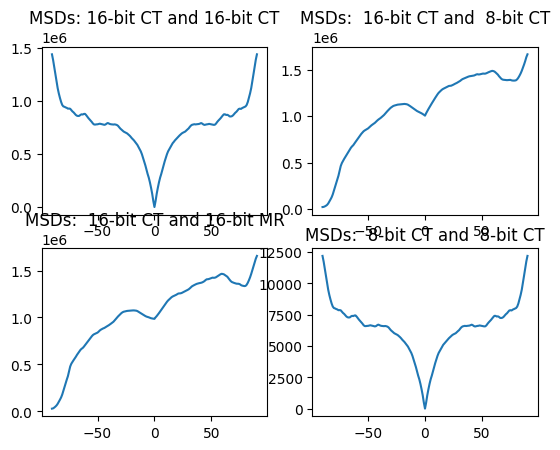

In [18]:
#%%
# ***************
# EDIT THE CODE BELOW SO THAT ON EACH ITERATION OF THE FOR LOOP THE IMAGES ARE ALL
# ROTATED BY THE CURRENT VALUE OF THETA ABOUT THE POINT 10,10 AND DISPLAY THE
# TRANSFORMED 8 BIT CT IMAGE
# ***************
from utils2 import affineMatrixForRotationAboutPoint
from utils2 import defFieldFromAffineMatrix
from utils2 import resampImageWithDefField
from utils2 import calcMSD
MSDs = np.zeros((theta.size, 4))
theta = np.arange(-90, 91, 1)
num_pix_x, num_pix_y = ct_img_int8.shape

import matplotlib.pyplot as plt
#%matplotlib qt
from utils2 import dispImage
for n in range(theta.size):
  #angle = theta[n]*np.pi/180
  
  # CREATE AFFINE MATRIX AND CORRESPONDING DEFORMATION FIELD
  aff_mat = affineMatrixForRotationAboutPoint(theta = theta[n], p_coords = np.array((10, 10)))
  def_field = defFieldFromAffineMatrix(aff_mat, num_pix_x, num_pix_y)
  # RESAMPLE THE IMAGES
  ct_img_int8_resamp = resampImageWithDefField(ct_img_int8, def_field, interp_method = 'linear', pad_value=np.NaN)
  ct_img_int16_resamp = resampImageWithDefField(ct_img_int16, def_field, interp_method = 'linear', pad_value=np.NaN)
  mr_img_int16_resamp = resampImageWithDefField(mr_img_int16, def_field, interp_method = 'linear', pad_value=np.NaN)
  
  # DISPLAY THE TRANSFORMED 8 BIT CT IMAGE
  
  # #add a short pause so the figure display updates
  # plt.figure()
  # dispImage(ct_img_int8_resamp)
  # plt.figure()
  # dispImage(ct_img_int16_resamp)
  # plt.figure()
  # dispImage(mr_img_int16_resamp)
  plt.pause(0.05)

  # ***************
  # UNCOMMENT AND EDIT THE CODE BELOW TO CALCULATE THE SSD VALUES BETWEEN:
  # 1) THE ORIGINAL 16 BIT CT IMAGE AND THE TRANSFORMED 16 BIT CT IMAGE
  # 2) THE ORIGINAL 16 BIT CT IMAGE AND THE TRANSFORMED 8 BIT CT IMAGE
  # 3) THE ORIGINAL 16 BIT CT IMAGE AND THE TRANSFORMED MR IMAGE
  # 4) THE ORIGINAL 8 BIT CT IMAGE AND THE TRANSFORMED 8 BIT CT IMAGE
  MSDs[n, 0] = calcMSD(ct_img_int16, ct_img_int16_resamp)
  MSDs[n, 1] = calcMSD(ct_img_int16, ct_img_int8_resamp)
  MSDs[n, 2] = calcMSD(ct_img_int16, mr_img_int16_resamp)
  MSDs[n, 3] = calcMSD(ct_img_int8, ct_img_int8_resamp)

  # plot the SSD values (y axis) against the angle theta (x axis)
plt.figure()
plt.subplot(2,2,1)
plt.plot(theta, MSDs[:, 0])
plt.title('MSDs: 16-bit CT and 16-bit CT')
plt.subplot(2,2,2)
plt.plot(theta, MSDs[:, 1])
plt.title('MSDs:  16-bit CT and  8-bit CT')
plt.subplot(2,2,3)
plt.plot(theta, MSDs[:, 2])
plt.title('MSDs:  16-bit CT and 16-bit MR')
plt.subplot(2,2,4)
plt.plot(theta, MSDs[:, 3])
plt.title('MSDs:  8-bit CT and  8-bit CT')

#   # ***************
  

In [20]:
calcMSD(ct_img_int16, ct_img_int16_resamp)

1438011.8642113095

In [30]:
def calcNCC(A, B):
    """
 function to calculate the normalised cross correlation between two images

 SYNTAX:
   NCC = calcNCC(A, B)

 INPUTS:
   A - an image stored as a 2D array
   B - an image stored as a 2D array. B must the the same size as A

 OUTPUTS:
   NCC - the value of the normalised cross correlation

 NOTE
   if either of the images contain NaN values these pixels should be
   ignored when calculating the NCC.
    """
    
    # ***************
    # ADD CODE HERE TO IMPLEMENT THE ABOVE FUNCTION USING THE FOLLOWING STEPS:
    # REMOVE PIXELS THAT CONTAIN NAN IN EITHER IMAGE
    
    # Remove pixels that contains NaN in either image
    A = A[~np.isnan(A)]
    B = B[~np.isnan(B)]
    
    # CALCULATE MEAN AND STD DEV OF EACH IMAGE
    A_mean = np.mean(A)
    B_mean = np.mean(B)
    A_std = np.std(A)
    B_std = np.std(B)


    # CALCULATE AND RETURN NCC
    # Normalize A
    A_norm = (A - A_mean) / A_std
    # Normalize B
    B_norm = (B - B_mean) / B_std

    # Calculate NCC
    #NCC = np.sum(A_norm * B_norm) / (A_norm.size - 1)
    return np.correlate(A_norm, B_norm, mode='valid')[0]
    #np.sum(A_norm * B_norm) / (A_norm.size - 1)

    # ***************

In [31]:
calcNCC(ct_img_int16, ct_img_int16_resamp)

-41.304213922425525

In [32]:
#%%
# ***************
# EDIT THE CODE BELOW SO THAT ON EACH ITERATION OF THE FOR LOOP THE IMAGES ARE ALL
# ROTATED BY THE CURRENT VALUE OF THETA ABOUT THE POINT 10,10 AND DISPLAY THE
# TRANSFORMED 8 BIT CT IMAGE
# ***************
from utils2 import affineMatrixForRotationAboutPoint
from utils2 import defFieldFromAffineMatrix
from utils2 import resampImageWithDefField
from utils2 import calcMSD
NCCs = np.zeros((theta.size, 4))
theta = np.arange(-90, 91, 1)
num_pix_x, num_pix_y = ct_img_int8.shape

import matplotlib.pyplot as plt
#%matplotlib qt
from utils2 import dispImage
for n in range(theta.size):
  #angle = theta[n]*np.pi/180
  
  # CREATE AFFINE MATRIX AND CORRESPONDING DEFORMATION FIELD
  aff_mat = affineMatrixForRotationAboutPoint(theta = theta[n], p_coords = np.array((10, 10)))
  def_field = defFieldFromAffineMatrix(aff_mat, num_pix_x, num_pix_y)
  # RESAMPLE THE IMAGES
  ct_img_int8_resamp = resampImageWithDefField(ct_img_int8, def_field, interp_method = 'linear', pad_value=np.NaN)
  ct_img_int16_resamp = resampImageWithDefField(ct_img_int16, def_field, interp_method = 'linear', pad_value=np.NaN)
  mr_img_int16_resamp = resampImageWithDefField(mr_img_int16, def_field, interp_method = 'linear', pad_value=np.NaN)
  
  # DISPLAY THE TRANSFORMED 8 BIT CT IMAGE
  
  # #add a short pause so the figure display updates
  # plt.figure()
  # dispImage(ct_img_int8_resamp)
  # plt.figure()
  # dispImage(ct_img_int16_resamp)
  # plt.figure()
  # dispImage(mr_img_int16_resamp)
  plt.pause(0.05)

  # ***************
  # UNCOMMENT AND EDIT THE CODE BELOW TO CALCULATE THE SSD VALUES BETWEEN:
  # 1) THE ORIGINAL 16 BIT CT IMAGE AND THE TRANSFORMED 16 BIT CT IMAGE
  # 2) THE ORIGINAL 16 BIT CT IMAGE AND THE TRANSFORMED 8 BIT CT IMAGE
  # 3) THE ORIGINAL 16 BIT CT IMAGE AND THE TRANSFORMED MR IMAGE
  # 4) THE ORIGINAL 8 BIT CT IMAGE AND THE TRANSFORMED 8 BIT CT IMAGE
  NCCs[n, 0] = calcNCC(ct_img_int16, ct_img_int16_resamp)
  NCCs[n, 1] = calcNCC(ct_img_int16, ct_img_int8_resamp)
  NCCs[n, 2] = calcNCC(ct_img_int16, mr_img_int16_resamp)
  NCCs[n, 3] = calcNCC(ct_img_int8, ct_img_int8_resamp)

  # plot the SSD values (y axis) against the angle theta (x axis)
plt.figure()
plt.subplot(2,2,1)
plt.plot(theta, NCCs[:, 0])
plt.title('NCCs: 16-bit CT and 16-bit CT')
plt.subplot(2,2,2)
plt.plot(theta, NCCs[:, 1])
plt.title('NCCs:  16-bit CT and  8-bit CT')
plt.subplot(2,2,3)
plt.plot(theta, NCCs[:, 2])
plt.title('NCCs:  16-bit CT and 16-bit MR')
plt.subplot(2,2,4)
plt.plot(theta, NCCs[:, 3])
plt.title('NCCs:  8-bit CT and  8-bit CT')

#   # ***************
  

KeyboardInterrupt: 

In [ ]:
# Find normalized cross correlation between two images
def calcNCC(A, B):
    